# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#Import the required libraries

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# fix warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset Leads from the CSV

leads=pd.read_csv("Leads.csv") 

In [3]:
# Check the shape of the data
leads.shape

(9240, 37)

In [4]:
#view the data from the dataframe
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#check all the columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Check the leads dataframe info to see all the columns their data types and nullability
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#check for the null values in the data set
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Data Cleaning

### Handling Missing or Null Values

In [8]:
#Checking for missing values in all the columns. Printing the columns with more than 35% of missing values

cut_off = 35
cols_to_drop = list(leads.columns[100*leads.isnull().mean()>cut_off])

print(cols_to_drop)
print(len(cols_to_drop))

['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
6


In [9]:
#Removing those 5 columns which have more than 40% of missing values

leads.drop(cols_to_drop,axis=1, inplace = True)

In [10]:
# Check the shape of the data after dropping 5 columns
leads.shape

(9240, 31)

In [11]:
#Checking the columns with less null prcentage

leads.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [13]:
#Checking the Value counts for Country

leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [14]:
# Displaying the null values for Country
leads.Country.isnull().sum()

2461

From the above analysis, it is seen that out of 9K records, 6K rows have value India, 2.5K has missing values and less than 500 rows have other country values. So this column doen't seem to add more value to tyhe analysis hence better to drop the column.

In [15]:
# dropping the "Country" Column
leads.drop(['Country'], axis = 1, inplace = True)

In [16]:
# Displaying the null values for City
leads.City.isnull().sum()

1420

In [17]:
#Checking the Value counts for City

leads.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

From the analysis it is seen that 2.2K values are 'Select', they are as good as 'NaN' the missing values. So replacing seclect with nan. So overall the % of missing values for the City column is more than 40% hence this column can be dropped

In [18]:
leads['City'].replace('Select', np.nan , inplace=True)

In [19]:
#Checking the Value counts for City

leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
# Displaying the null values for City
leads.City.isnull().sum()

3669

In [21]:
leads.City.isnull().mean()*100

39.70779220779221

In [22]:
# Dropping the column 'City'

leads.drop(['City'], axis = 1, inplace = True)

In [23]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [24]:
#cols_with_nulls = ["Lead Profile", "What matters most to you in choosing a course","What is your current occupation  ", 
 #                  "How did you hear about X Education", "Specialization", "Last Activity","Page Views Per Visit",
  #                "TotalVisits", "Lead Source" ]

In [25]:
# checking the value counts of all the columns, escpecially to find the columns with 'Select' Values.

for cols in leads:
    print(leads[cols].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

From the above analysis it is found that "Lead Profile", "How did you hear about X Education" and "Specialization" columns have 'Select' values

Digging further on the coulmns with 'Select' values

In [26]:
#Checking the value counts

leads["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [27]:
leads["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [28]:
leads["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Since "Lead Profile" and "How did you hear about X Education" have more than 35% of 'Seclect' values (as good as missing values), dropping these 2 columns.

In [29]:
# dropping 'Lead Profile' and 'How did you hear about X Education' columns

leads.drop('Lead Profile', axis = 1, inplace = True)

leads.drop('How did you hear about X Education', axis = 1, inplace = True)

In [30]:
# For specialization, replacing the 'Select' with nan and them make it as a new 'Missing' category. This column could be important for analysis further

leads['Specialization'].replace('Select', np.nan , inplace=True)

In [31]:
leads['Specialization'].isnull().mean()

0.3658008658008658

In [32]:
leads['Specialization'].fillna('Missing', inplace= True)

In [33]:
#Checking the Null values in the leads dataframe again

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [34]:
#For below two columns, creating the seperate category with the value 'Missing' for missing/null values\

leads['What is your current occupation'].fillna('Missing', inplace= True)

leads['What matters most to you in choosing a course'].fillna('Missing', inplace= True)

In [35]:
#Checking the Null values in the leads dataframe again

leads.isnull().mean()*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

Since 'TotalVisits', 'Lead Source ', 'Page Views Per Visit ', 'Last Activity' columns have very few rows with null value (less than 1.5% each), so dropping those rows.

In [36]:
#Shape of original dataframe leads
leads.shape

(9240, 27)

In [37]:
#Dropping rows with null/missing values in a new dataframe leads1
leads1 = leads.dropna()

In [38]:
leads1.shape

(9074, 27)

In [39]:
#Total % of rows deleted with null values

# Checking the percent of lose if the null values are removed
round(100*(sum(leads.isnull().sum(axis=1) > 1)/leads.shape[0]),2)

1.48

In [40]:
#Final check on null/missing values

leads1.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

As Prospect id is a unique identifier for the prospects, we can drop this column as it will not add value in the further analysis.

In [41]:
# Removing Prospect Id 
leads2 = leads1.drop('Prospect ID',1)
leads2.shape

(9074, 26)

In [42]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

From the value count summary earlier, it was seen that the coulumn 'Lead Source', 'Last Activity' and 'Last Notable Activity' have categorical values with few rows, so performing fuirther analysis on these colums to have some standardization.

In [43]:
# 'Lead Source' column

leads2["Lead Source"].value_counts(normalize = True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

In [44]:
#Standardizing all the <2% values for Lead Source column to a singler category 'Others'

leads2["Lead Source"]= leads2["Lead Source"].replace(['Welingak Website', 'Referral Sites', 'Facebook', 'bing','Click2call', 'Press_Release', 'Social Media', 'Live Chat',
                                                       'youtubechannel', 'testone', 'Pay per Click Ads', 
                                                      'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'], "Others")



In [45]:
#All google valoes to 'Google' Category

leads2["Lead Source"]= leads2["Lead Source"].replace(['Google','google'],"Google")

In [46]:
leads2["Lead Source"].value_counts(normalize = True)*100

Google            31.661891
Direct Traffic    28.025127
Olark Chat        19.318933
Organic Search    12.717655
Reference          4.882081
Others             3.394313
Name: Lead Source, dtype: float64

In [47]:
# 'Last Activity' Column


leads2["Last Activity"].value_counts(normalize = True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: Last Activity, dtype: float64

In [48]:
#Rebucketing the values which are less than 3% to 'Others' category

leads2["Last Activity"]= leads2["Last Activity"].replace(['Email Link Clicked', 'Form Submitted on Website', 'Unreachable', 'Unsubscribed', 
                                                          'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 
                                                          'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow','Resubscribed to emails'], "Others")

In [49]:
leads2["Last Activity"].value_counts(normalize = True)*100

Email Opened               37.822350
SMS Sent                   29.931673
Olark Chat Conversation    10.711924
Page Visited on Website     7.053119
Others                      6.325766
Converted to Lead           4.716773
Email Bounced               3.438395
Name: Last Activity, dtype: float64

In [50]:
# 'Last Notable Activity' Column value counts


leads2["Last Notable Activity"].value_counts(normalize = True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

In [51]:
#Rebucketing the values which are less than 3% to 'Others' category

leads2["Last Notable Activity"]= leads2["Last Notable Activity"].replace(['Olark Chat Conversation','Email Link Clicked', 'Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 
                                                'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails','View in browser link Clicked',
                                                'Form Submitted on Website', 'Email Received'] , "Others")

In [52]:
leads2["Last Notable Activity"].value_counts(normalize = True)*100

Modified                   36.003967
Email Opened               31.110866
SMS Sent                   23.716112
Others                      5.664536
Page Visited on Website     3.504518
Name: Last Notable Activity, dtype: float64

In [53]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

# Univariate Analysis

##### Coverted the Target Variable
##### 1 - Coverted
##### 0 - Non Converted

In [54]:
# Checking the Target Variable

leads2.Converted.value_counts(normalize=True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

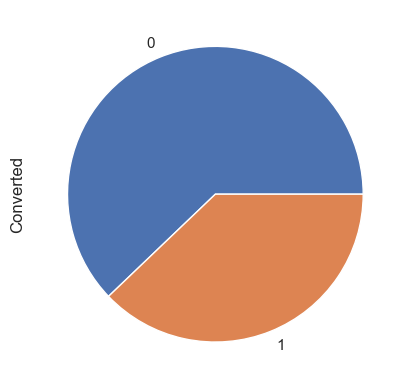

In [55]:
#Plot the pie chart for the TARGET variable
leads2.Converted.value_counts(normalize=True).plot.pie()
plt.show()

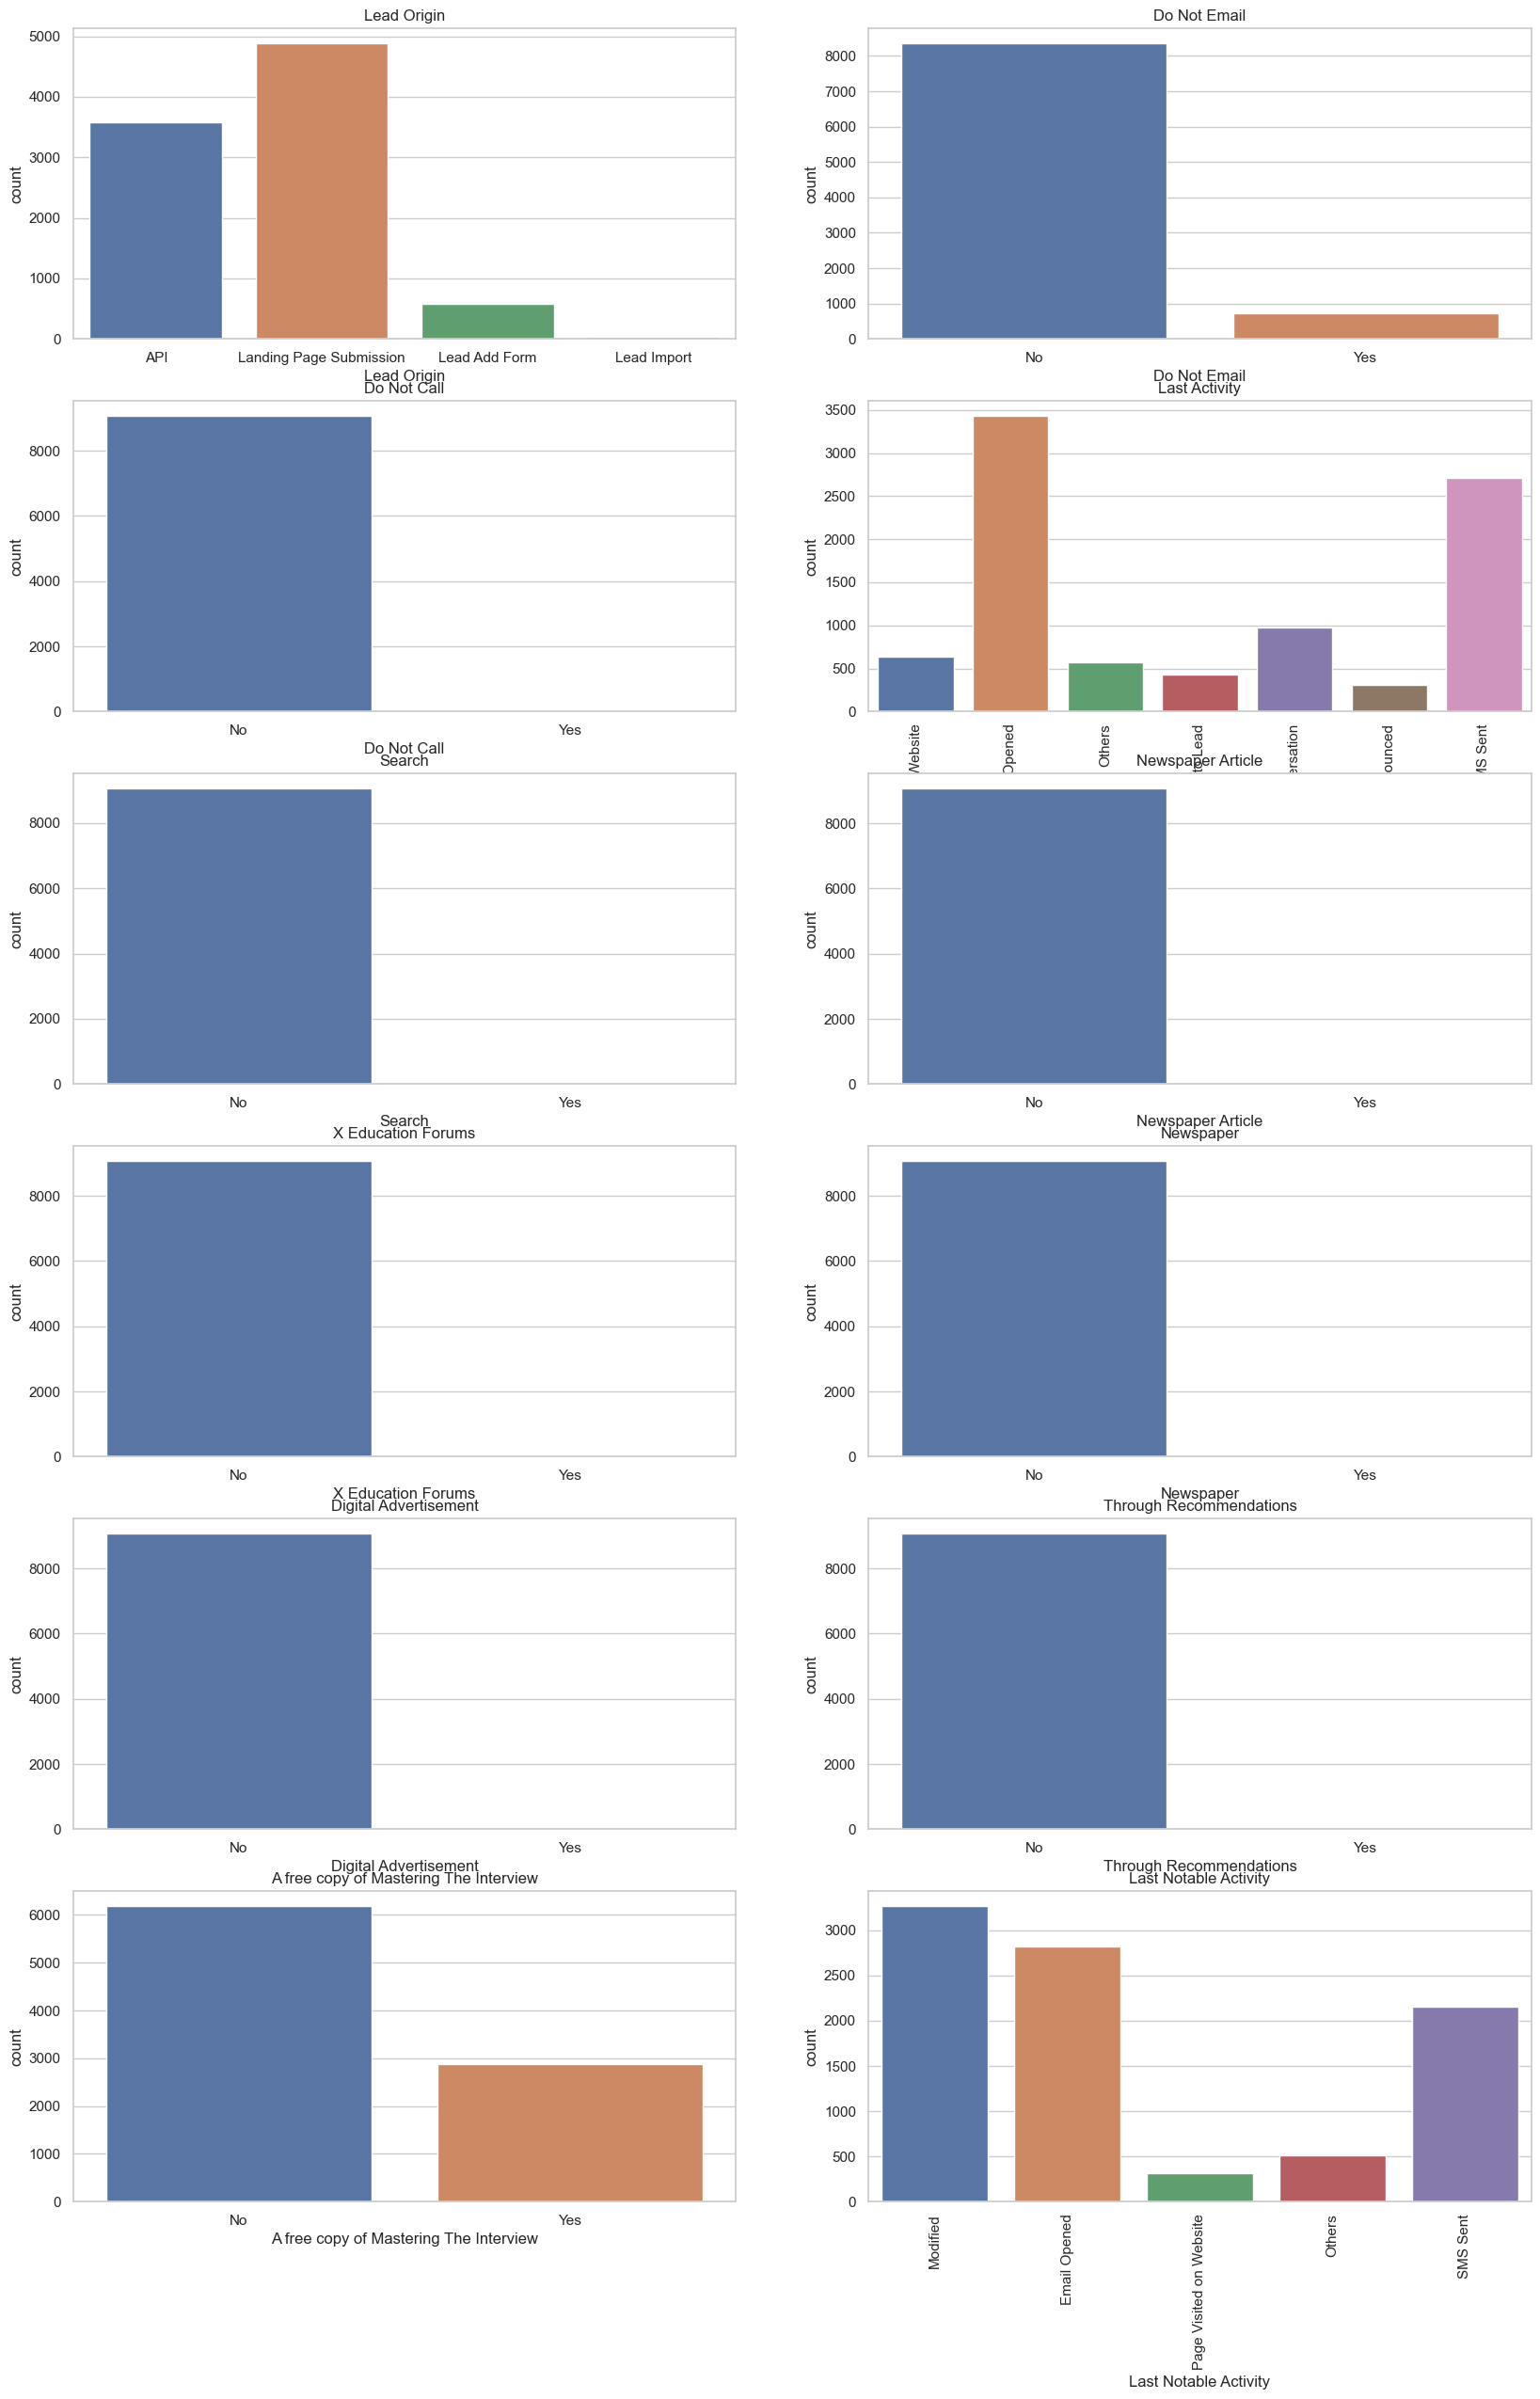

In [56]:
# Plotting Counts for Categorical Variables


plt.figure(figsize = (20,30))

plt.subplot(6,2,1)
sns.countplot(leads2, x = 'Lead Origin')
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads2, x='Do Not Email')
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads2, x ='Do Not Call')
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leads2, x ='Last Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(6,2,5)
sns.countplot(leads2, x = 'Search')
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leads2, x ='Newspaper Article')
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(leads2, x = 'X Education Forums')
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(leads2, x='Newspaper')
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(leads2, x='Digital Advertisement')
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(leads2, x ='Through Recommendations')
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(leads2, x= 'A free copy of Mastering The Interview')
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(leads2, x = 'Last Notable Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

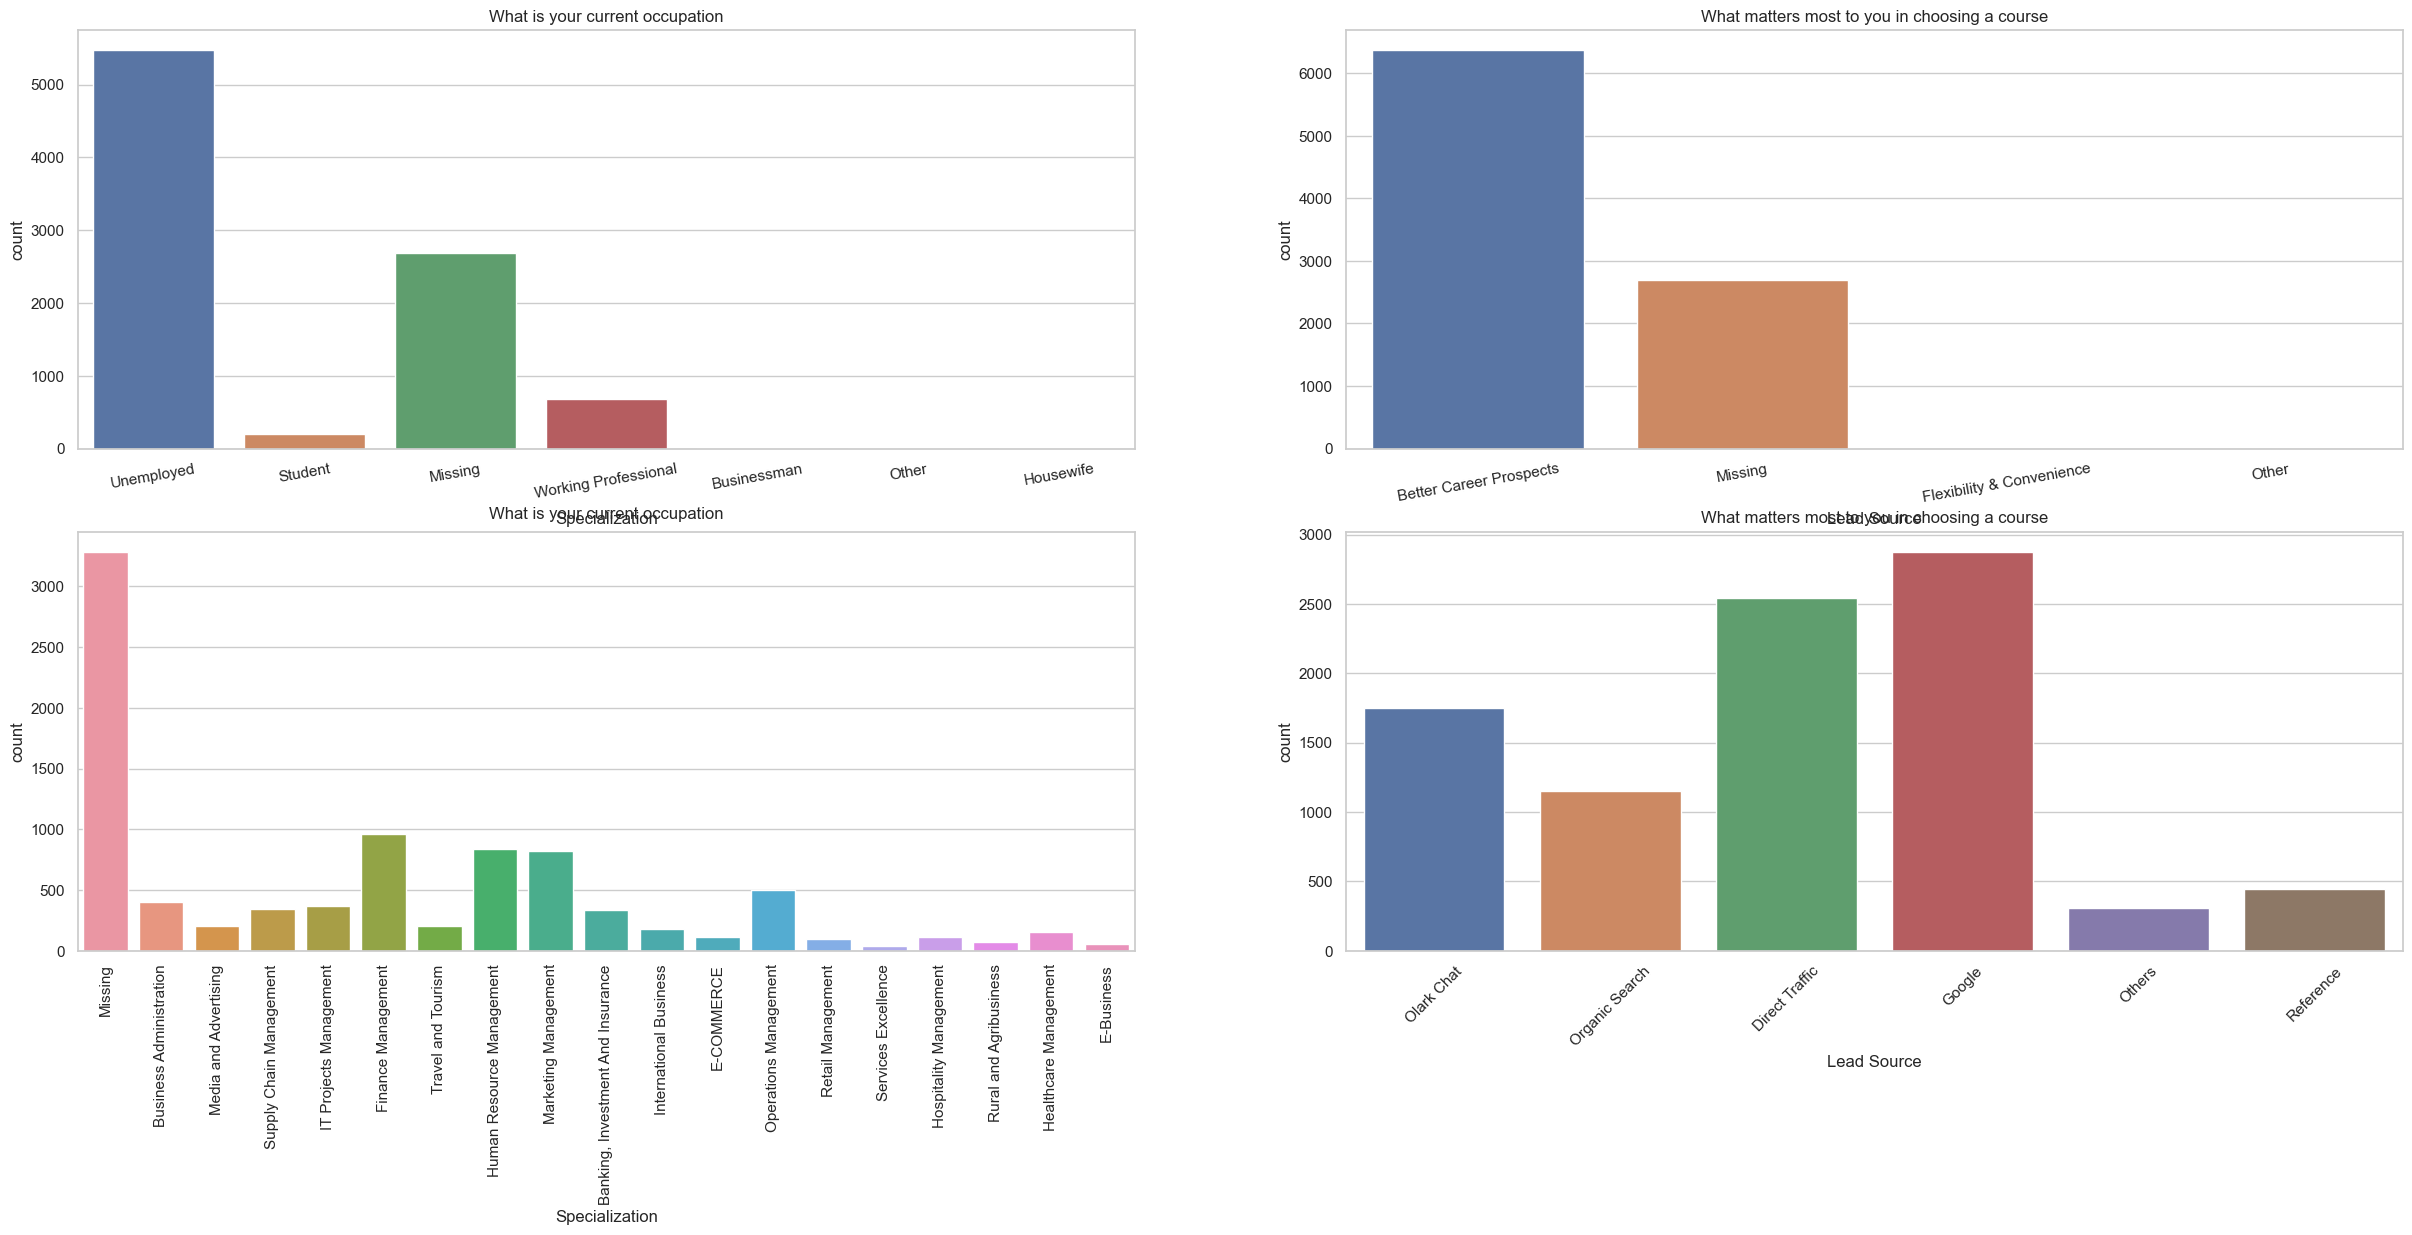

In [57]:
# Plotting Counts for more categoriocal columns

plt.figure(figsize = (30,25))

plt.subplot(4,2,1)
sns.countplot(leads2, x = 'What is your current occupation').tick_params(axis='x', rotation = 10)
plt.title('What is your current occupation')

plt.subplot(4,2,2)
sns.countplot(leads2, x='What matters most to you in choosing a course').tick_params(axis='x', rotation = 10)
plt.title('What matters most to you in choosing a course')

plt.subplot(4,2,3)
sns.countplot(leads2, x ='Specialization').tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(4,2,4)
sns.countplot(leads2, x ='Lead Source').tick_params(axis='x', rotation = 45)
plt.title('Lead Source')

plt.show()

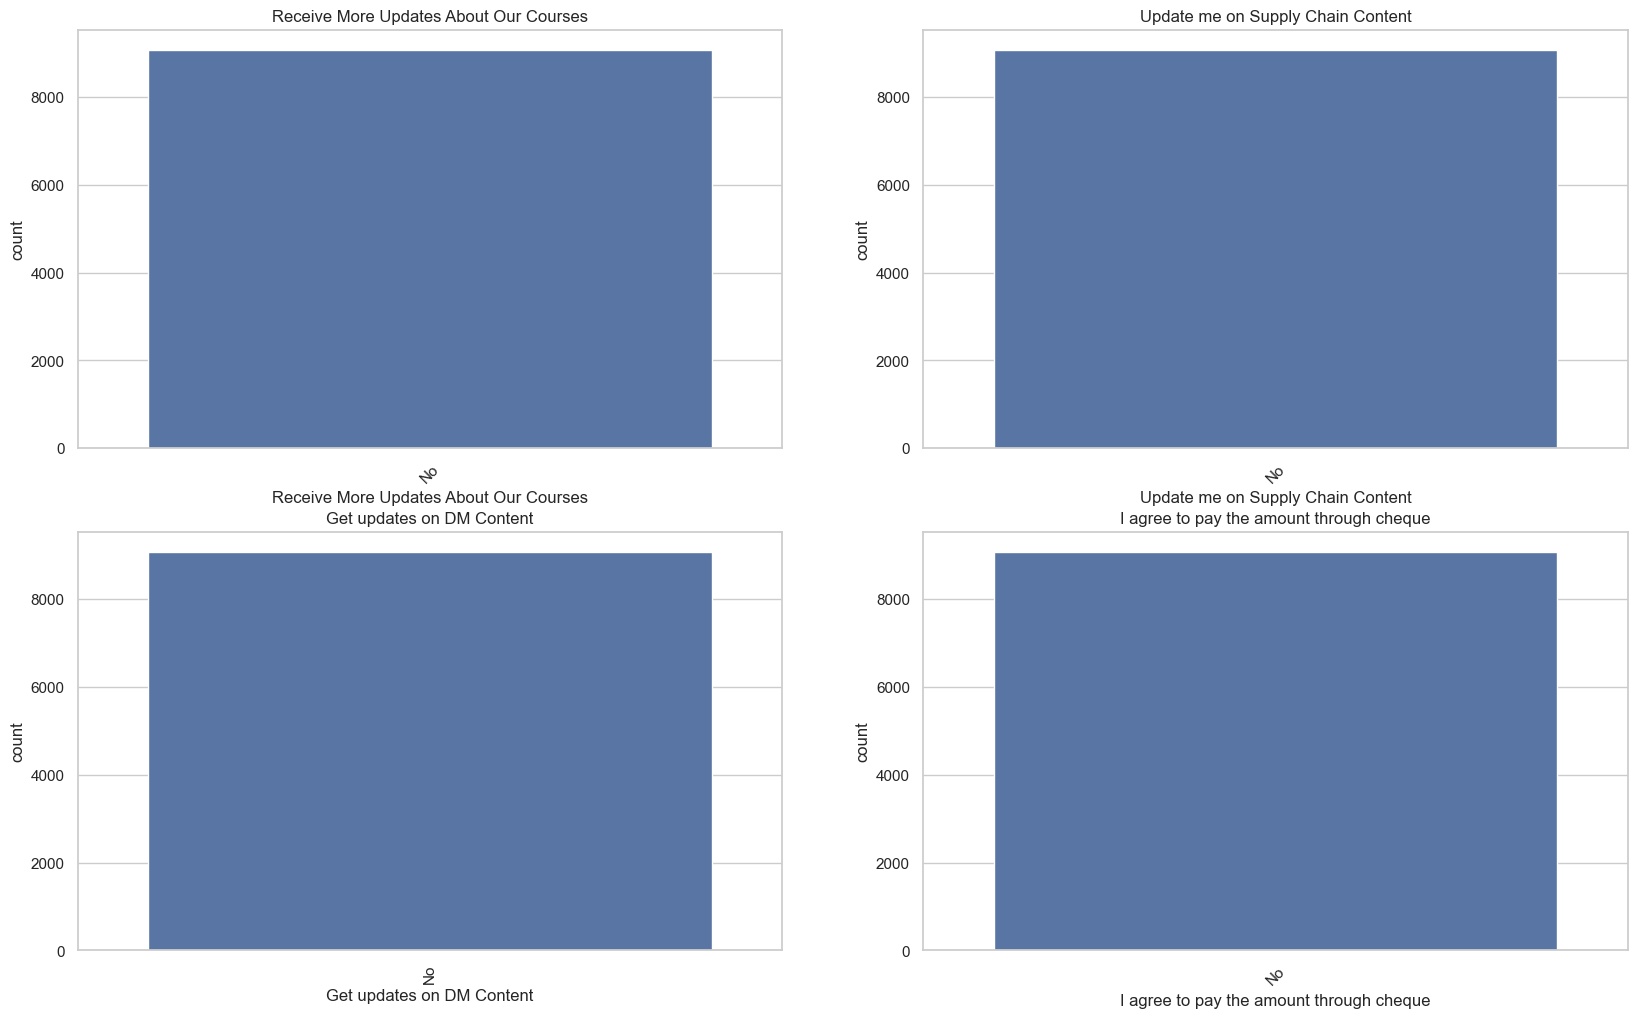

In [58]:
# Plotting Counts for more categoriocal columns

plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
sns.countplot(leads2, x = 'Receive More Updates About Our Courses').tick_params(axis='x', rotation = 45)
plt.title('Receive More Updates About Our Courses')

plt.subplot(4,2,2)
sns.countplot(leads2, x='Update me on Supply Chain Content').tick_params(axis='x', rotation = 45)
plt.title('Update me on Supply Chain Content')

plt.subplot(4,2,3)
sns.countplot(leads2, x ='Get updates on DM Content').tick_params(axis='x', rotation = 90)
plt.title('Get updates on DM Content')

plt.subplot(4,2,4)
sns.countplot(leads2, x ='I agree to pay the amount through cheque').tick_params(axis='x', rotation = 45)
plt.title('I agree to pay the amount through cheque')

plt.show()

Above plots show that there are quite a few columns which have only one value especially on the yes or no ones. 

They have mostly 'No' values in all the records, hence they can be dropped becuase they would add value in the further analysis.



In [59]:
#Dropping columns

leads2.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [60]:
leads2.shape

(9074, 14)

In [61]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Specialization                                 9074 

### Numerical variable analysis

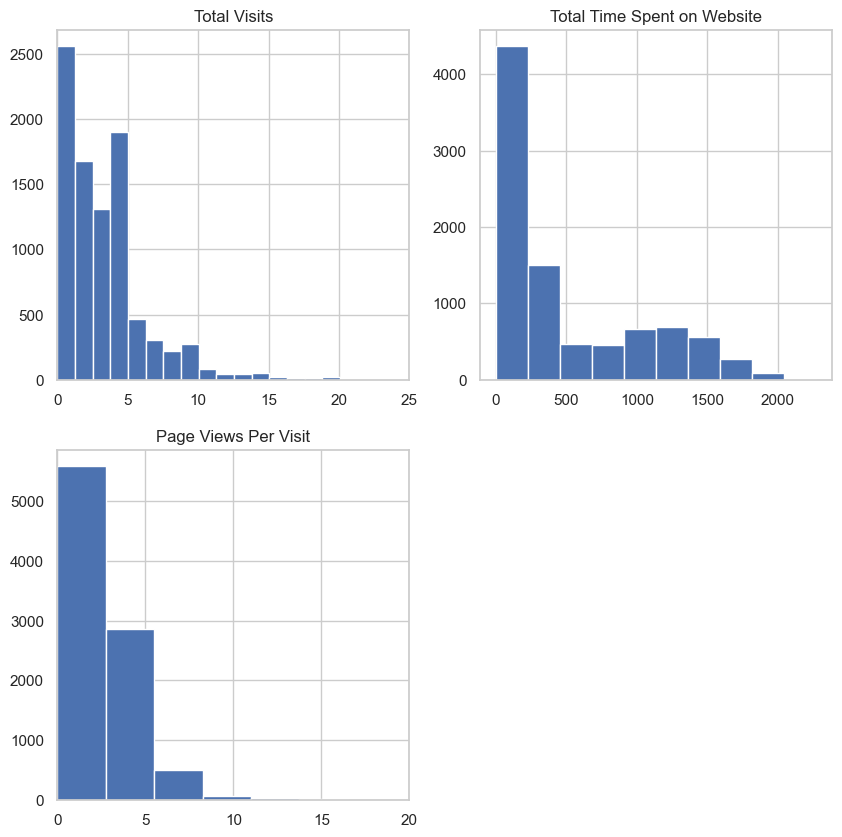

In [62]:
#Plotting histogram for numerical variables


plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads2['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Checking for outliers

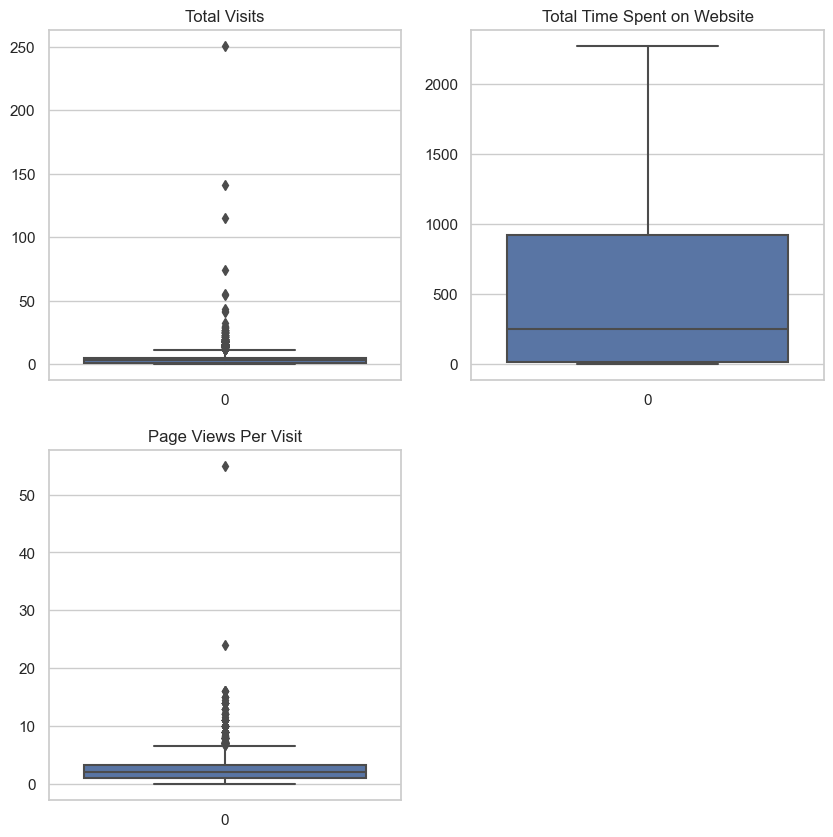

In [63]:
#plot the boxplot of numerical variable.

plt.figure(figsize = (10,10))
plt.subplot(221)
sns.boxplot(leads2['TotalVisits'])
plt.title('Total Visits')


plt.subplot(222)
sns.boxplot(leads2['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.boxplot(leads2['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.show()

Above boxplots show that 'Total Visits' and 'Page Views' have outliers, so digging a bit more to anylyze these two columns further.

In [64]:
leads2.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [65]:
leads2["TotalVisits"].quantile([0.5,.7,.8,.9,.95,.99,1])

0.50      3.0
0.70      4.0
0.80      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [66]:
leads2[leads2["TotalVisits"]>50].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,617093.833333,0.166667,115.000000,629.500000,14.705000
std,16301.249221,0.408248,75.065305,532.553002,20.072246
min,602958.000000,0.000000,54.000000,49.000000,1.480000
25%,607088.250000,0.000000,59.750000,214.500000,5.052500
50%,608359.500000,0.000000,94.500000,526.000000,7.460000
75%,630255.000000,0.000000,134.500000,1095.500000,11.300000
max,638668.000000,1.000000,251.000000,1280.000000,55.000000


In [67]:
leads2[leads2["Page Views Per Visit"]>20].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2.000000,2.000000,2.00000,2.000000,2.00000
mean,618123.500000,0.500000,39.50000,912.000000,39.50000
std,29054.310532,0.707107,21.92031,869.741341,21.92031
min,597579.000000,0.000000,24.00000,297.000000,24.00000
25%,607851.250000,0.250000,31.75000,604.500000,31.75000
50%,618123.500000,0.500000,39.50000,912.000000,39.50000
75%,628395.750000,0.750000,47.25000,1219.500000,47.25000
max,638668.000000,1.000000,55.00000,1527.000000,55.00000


From above it is seen that although there are outliers but there have been some conversions as well in these rows hence, want to keep those records. So the values for the outliers will be imputed with median values.

Imputing Outliers

In [68]:
# Imputing "Page Views Per Visit" columns with median for outliers which are above 20 - there are only 2 records.

leads2["Page Views Per Visit"] = leads2["Page Views Per Visit"].mask(leads2["Page Views Per Visit"] >20, leads2["Page Views Per Visit"].median())

In [69]:
# Imputing "TotalVisits" columns with median for outliers which are above 50 - there are only 6 records.

leads2["TotalVisits"] = leads2["TotalVisits"].mask(leads2["TotalVisits"] >50, leads2["TotalVisits"].median())

In [70]:
leads2.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.381970,482.887481,2.361886
std,23348.029512,0.485053,3.502768,545.256560,2.076648
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.127500
max,660737.000000,1.000000,43.000000,2272.000000,16.000000


# Bivariate Analysis

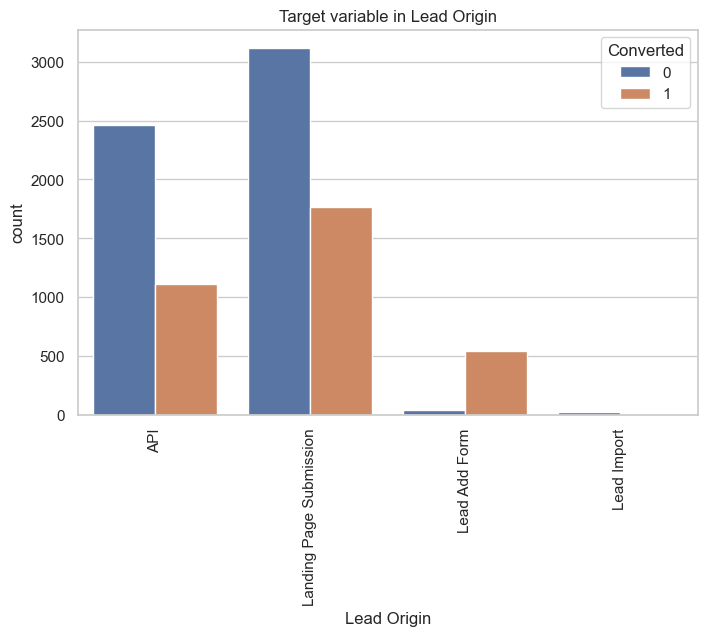

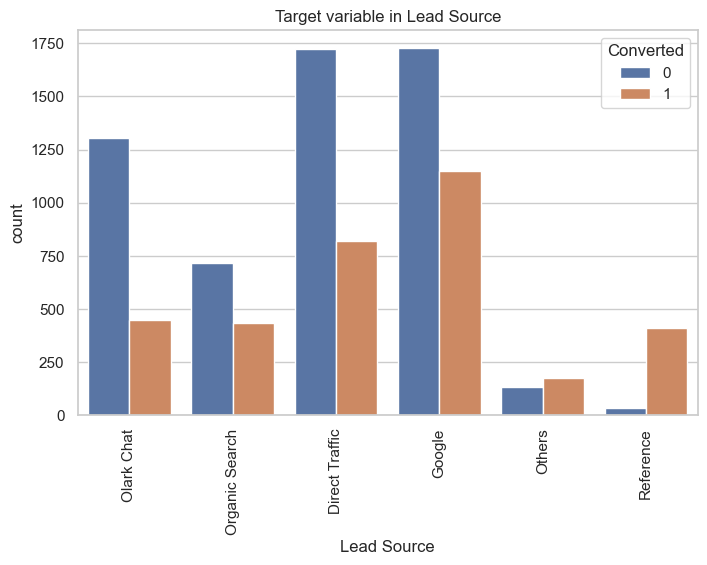

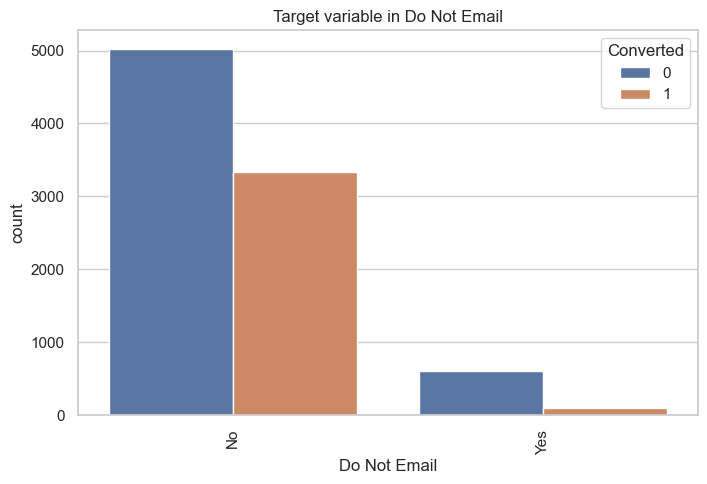

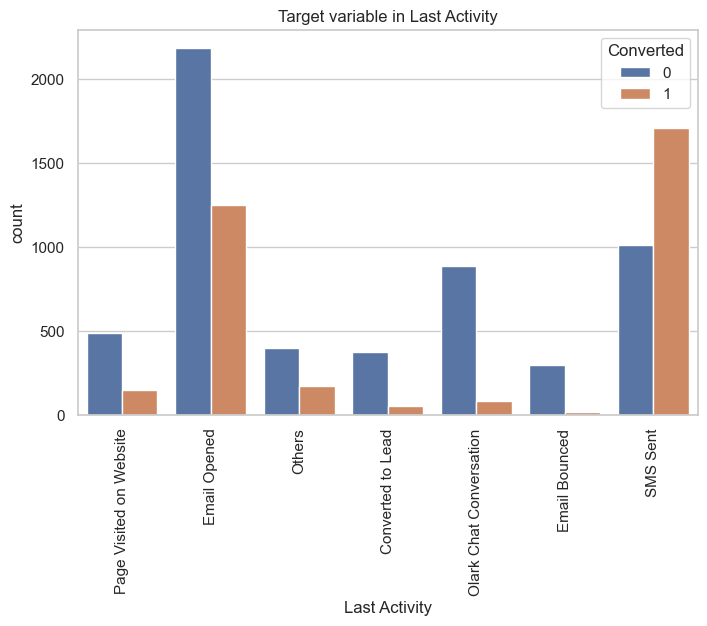

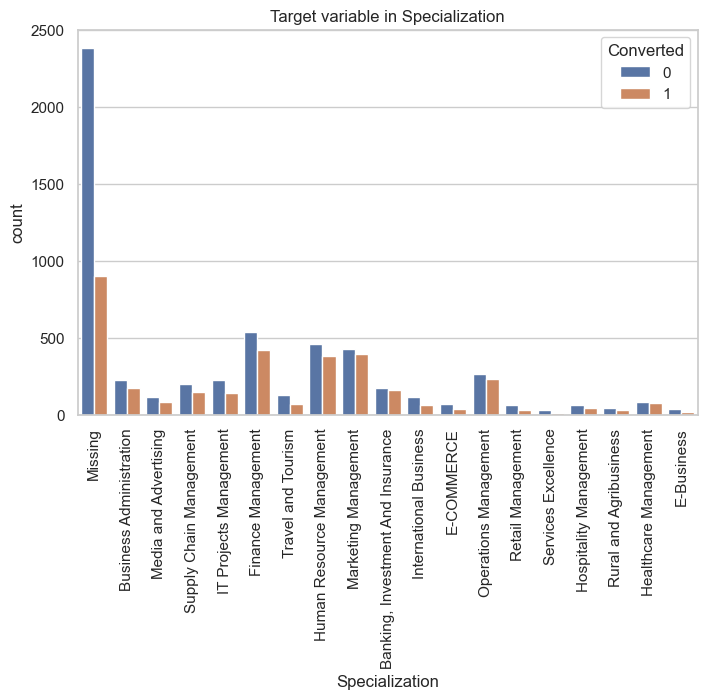

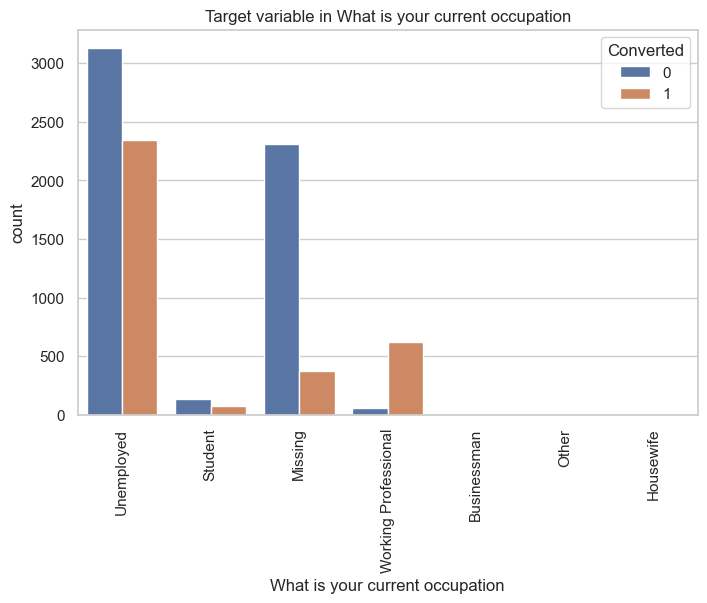

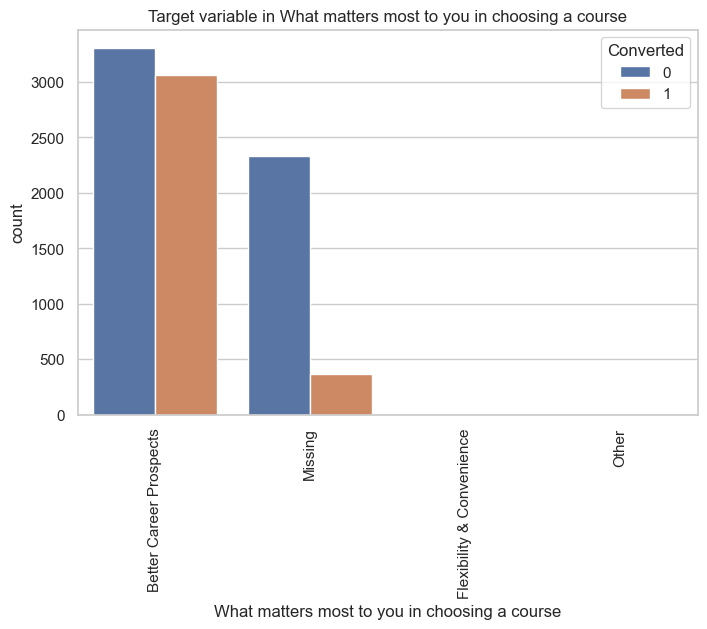

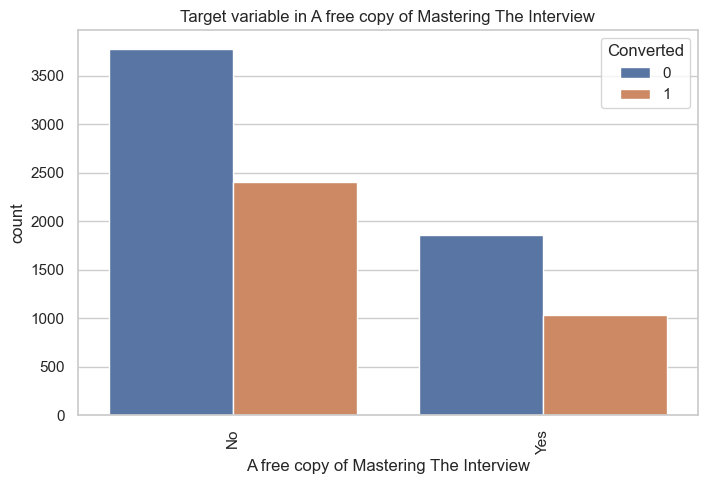

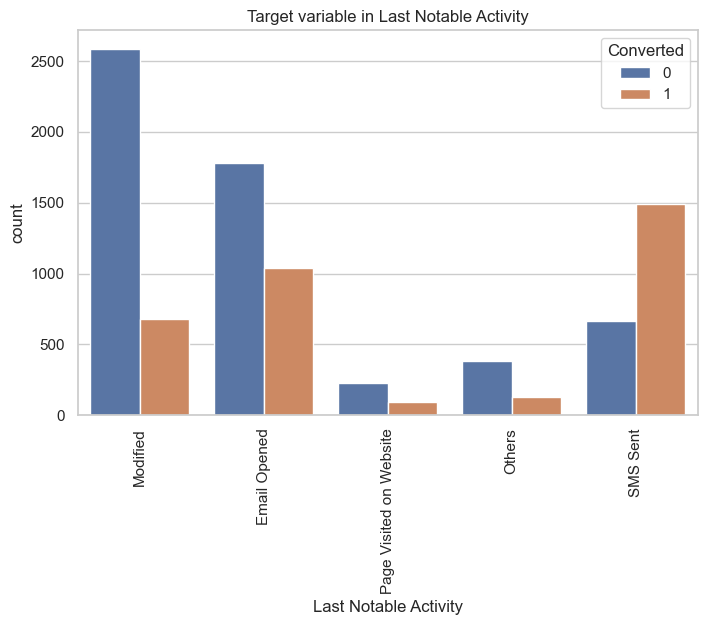

In [71]:
catcols = leads2.select_dtypes(include ="object").columns
for i in catcols:
    
    plt.figure(figsize =(8,5))
    sns.countplot(leads2, x= i, hue=leads2.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

Above plots show that for what different categories of the variables, the prospects have converted.

As per the plots;

1. The prospects with Lead Origin as 'Landing Page Submissions' are more likely to convert followed by 'API'
2. The prospects whose Lead Source is 'Google' are more likely to convert, followed by 'Direct traffic'
3. The prospects/customers who have opened the emails or sent the SMS have high rate of conversion.
4. The prospects with high convertion rates chose not provide their 'Speciallization', the values are missing.
5. The people who are 'Unemployed' have very high chances of conversion, followed by 'Working Professionals'

Checking the correlation between the variables

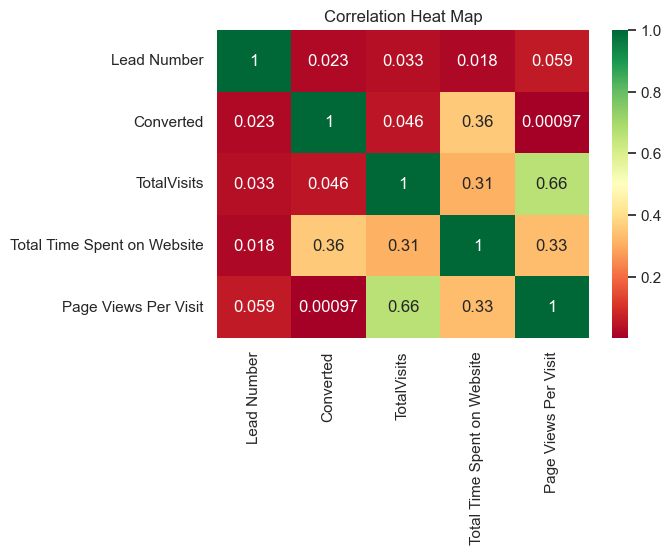

In [72]:
plt.figure(figsize=(6,4))
sns.heatmap(leads2.corr(),cmap="RdYlGn",annot=True)
plt.title('Correlation Heat Map')
plt.show()

It is observed that there is reasonable correlation betwen 'Page Views Per Visit' and 'TotalVisits'.

In [73]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Specialization                                 9074 

dropping column Lead Number, before going to the next step, as it is an ID field which is unique for a row, so wouldn't add value for the analysis or prediction

In [74]:
leads2.drop(['Lead Number'], axis = 1, inplace = True)

In [75]:
leads2.shape

(9074, 13)

# Data Preperation

### Creation of dummy variables

In [76]:
categorical = leads2.loc[:, leads2.dtypes == 'object']
categorical.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [77]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads2[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization',
                              'What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

In [78]:
#Merging dummy variables with the main main dataframe leads2

leads_final = pd.concat([leads2, dummy], axis=1)
leads_final

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Missing,Unemployed,...,1,0,0,0,0,0,1,0,0,0
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Missing,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,1,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Missing,Unemployed,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Others,IT Projects Management,Unemployed,...,1,0,0,0,0,0,0,1,0,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,1,0,0,0,0,1,0,0,0,1
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,1,0,0,0,0,1,0,0,0,1
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Missing,...,0,0,0,1,0,0,0,0,0,1


In [79]:
# As dummies are created for categorical variables, dropping the original ones.
leads_final = leads_final.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization',
                              'What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 
                              'Last Notable Activity'], 1)
leads_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


## Test Train Data Split

In [80]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

#Train Test split with a ratio of 70:30
leads_train, leads_test = train_test_split(leads_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [81]:
#Checking the shape of test and train datasets

leads_train.shape

(6351, 51)

In [82]:
leads_test.shape

(2723, 51)

In [83]:
leads_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,2.0,397,2.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1012,0,2.0,190,2.0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
9226,0,0.0,0,0.0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4750,1,2.0,1380,2.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7987,1,5.0,1584,2.5,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [84]:
leads_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3271,0,4.0,157,4.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1490,1,5.0,1513,5.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7936,0,2.0,74,2.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4216,1,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3830,0,8.0,164,8.0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [85]:
# Scaling of variables

var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Using MinMax scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
leads_train[var] = scaler.fit_transform(leads_train[var])

In [86]:
leads_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,0.046512,0.178347,0.12500,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1012,0,0.046512,0.085355,0.12500,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
9226,0,0.000000,0.000000,0.00000,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4750,1,0.046512,0.619946,0.12500,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7987,1,0.116279,0.711590,0.15625,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [87]:
leads_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.385136,0.078911,0.217585,0.148353,0.535979,0.068651,0.003779,0.320737,0.186427,0.127224,...,0.605574,0.075894,0.0,0.294914,0.000157,0.315383,0.359471,0.056212,0.034483,0.244371
std,0.486666,0.081059,0.244868,0.130092,0.498743,0.252879,0.061362,0.466797,0.389482,0.333250,...,0.488766,0.264849,0.0,0.456040,0.012548,0.464705,0.479883,0.230348,0.182480,0.429747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.023256,0.004492,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.069767,0.110961,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.116279,0.413522,0.208125,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into train data into X and Y sets for the model building

In [88]:
y_train = leads_train.pop('Converted')
X_train = leads_train

In [89]:
print(X_train.shape)
print(y_train.shape)

(6351, 50)
(6351,)


# Model Building

### RFE Method - Recursive Feature Elimination

In [90]:
# Imported RFE and LogisticRegressions libraries at the same cell where all other libraies are imported

logrm = LogisticRegression()

In [91]:
# running RFE to auto choose 15 variables 
rfe = RFE(logrm,n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [92]:
# Variables/Features selected by RFE and their rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', False, 10),
 ('Lead Source_Reference', False, 2),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 30),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 25),
 ('Specialization_E-Business', False, 13),
 ('Specialization_E-COMMERCE', False, 20),
 ('Specialization_Finance Management', False, 33),
 ('Specialization_Healthcare Management', False, 32),
 ('Specialization_Hos

In [93]:
#Variables chosen

cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Missing',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Missing',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [94]:
#Variables not chosen by RFE
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       '

### Building model using statsmodel, for the detailed statistics

### Defing functions for building stats models, Calculating VIF and displaying the summary

In [95]:
#Function to build a model using statsmodel api
def stats_model(cols):
# Adding a constant variable to RFE selected variables
    X_train_sm = sm.add_constant(X_train[cols])
# Running the logistic model
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    print(res.summary())
    return res

In [96]:
#Function to calculate VIFs for the models
def cal_vif(cols):
    X1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = X1.columns
    vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [97]:
# Creating X_train dataframe with RFE selected 16 variables
X_train_rfe = X_train[cols]
X_train_rfe

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Specialization_Missing,What is your current occupation_Housewife,What is your current occupation_Working Professional,What matters most to you in choosing a course_Missing,Last Notable Activity_SMS Sent
3009,0.046512,0.178347,0.12500,1,0,0,0,1,0,0,0,0,0,1,0
1012,0.046512,0.085355,0.12500,1,0,0,1,0,0,0,1,0,1,1,0
9226,0.000000,0.000000,0.00000,0,0,1,0,0,0,1,1,0,0,0,0
4750,0.046512,0.619946,0.12500,1,0,0,0,0,0,1,0,0,0,1,1
7987,0.116279,0.711590,0.15625,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.116279,0.363432,0.31250,0,0,0,0,0,0,0,1,0,0,1,0
82,0.000000,0.000000,0.00000,0,0,1,0,0,1,0,0,0,1,0,0
8199,0.000000,0.000000,0.00000,0,1,0,0,0,0,1,1,0,0,0,1
7077,0.116279,0.206199,0.31250,1,0,0,0,1,0,0,0,0,0,0,0


### Running first model with 15 Variables

### Model1

In [98]:
print(cols)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Missing',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Missing',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [99]:
stats_model(cols)
cal_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2528.5
Date:                Tue, 27 Feb 2024   Deviance:                       5057.0
Time:                        18:49:02   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4154
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

p vale for 'What is your current occupation_Housewife ' is high so removing this feature. Also, VIF is slightly higher for 'Last Activity_SMS Sent' and 'Page Views Per Visit'

### Model 2

In [100]:
# Dropping feature 'What is your current occupation_Housewife'
cols2 = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Missing',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Missing',
       'Last Notable Activity_SMS Sent']

stats_model(cols2)
cal_vif(cols2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2532.1
Date:                Tue, 27 Feb 2024   Deviance:                       5064.3
Time:                        18:49:03   Pearson chi2:                 6.39e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4147
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

p value seems good, but VIF for 'Last Activity_SMS Sent' is high, hence dropping.

### Model 3

In [101]:
# Dropping feature 'Last Activity_SMS Sent'
cols3 = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Specialization_Missing',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Missing',
       'Last Notable Activity_SMS Sent']

stats_model(cols3)
cal_vif(cols3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.7
Date:                Tue, 27 Feb 2024   Deviance:                       5131.3
Time:                        18:49:03   Pearson chi2:                 6.57e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4085
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

VIF is good however for 'Page Views Per Visit ' it is slightly higher than 5, so dropping the feature

### Model 4

In [102]:
# Dropping feature 'Page Views Per Visit'
cols4 = ['TotalVisits', 'Total Time Spent on Website', 
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Specialization_Missing',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Missing',
       'Last Notable Activity_SMS Sent']

stats_model(cols4)
cal_vif(cols4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.9
Date:                Tue, 27 Feb 2024   Deviance:                       5143.7
Time:                        18:49:03   Pearson chi2:                 6.55e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

p value and VIF look good for all the features

## Making Predictions

In [103]:
#Building the final model for predictions using the selected variables/features in Model 4 above

X_train_final = sm.add_constant(X_train[cols4])

# Running the logistic model
logm_f = sm.GLM(y_train, X_train_final, family = sm.families.Binomial())
res_f = logm_f.fit()
print(res_f.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.9
Date:                Tue, 27 Feb 2024   Deviance:                       5143.7
Time:                        18:49:04   Pearson chi2:                 6.55e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [104]:
# Predicting the probabilities on the train set

y_train_pred = res_f.predict(sm.add_constant(X_train[cols4]))
y_train_pred[:10]

3009    0.079012
1012    0.035486
9226    0.167173
4750    0.713860
7987    0.628080
1281    0.789180
2880    0.038874
4971    0.970062
7536    0.880528
1248    0.553796
dtype: float64

In [105]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07901208, 0.03548583, 0.16717319, 0.71386007, 0.62807967,
       0.78917996, 0.03887428, 0.97006212, 0.88052836, 0.55379567])

In [106]:
# Creating a Dataframe with actual converted rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.079012
1,0,0.035486
2,0,0.167173
3,1,0.713860
4,1,0.628080


In [107]:
# Creating a new column 'Predicted' by assigning the values as 0 or 1 with the cut off as 0.5 on 'Conversion_Prob'

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.079012,0
1,0,0.035486,0
2,0,0.167173,0
3,1,0.713860,1
4,1,0.628080,1


# Model Evaluation

In [108]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3456  449]
 [ 741 1705]]


In [109]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.812627932609038

Accuracy is over 81%

### Evaluating other the metrics

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.697056418642682

In [112]:
# Calculating the specificity
TN/(TN+FP)

0.8850192061459667

### Finding the Optimal Cutoff leveraging ROC Curve


Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [113]:
# Creating a function for ROC

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

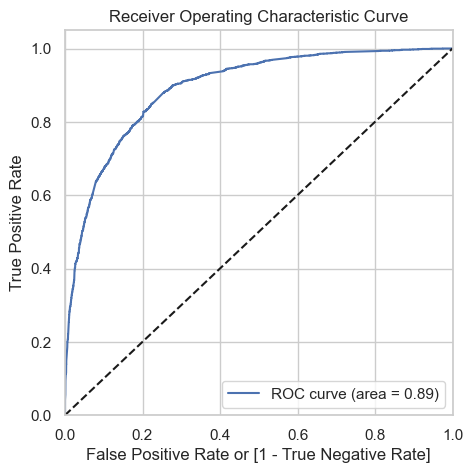

In [115]:
# Plotting ROC Curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Area under the curve is 0.89 which is good, so need to check for the optimal cutoff point

### Finding optimal cutoff point

Optimal cutoff point is that probability where we get balanced sensitivity and specificity

In [116]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.079012,0,1,0,0,0,0,0,0,0,0,0
1,0,0.035486,0,1,0,0,0,0,0,0,0,0,0
2,0,0.167173,0,1,1,0,0,0,0,0,0,0,0
3,1,0.713860,1,1,1,1,1,1,1,1,1,0,0
4,1,0.628080,1,1,1,1,1,1,1,1,0,0,0


In [117]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.618328  0.978332  0.392830
0.2   0.2  0.766336  0.914554  0.673496
0.3   0.3  0.804283  0.845462  0.778489
0.4   0.4  0.811368  0.774325  0.834571
0.5   0.5  0.812628  0.697056  0.885019
0.6   0.6  0.810896  0.639411  0.918310
0.7   0.7  0.789167  0.535159  0.948271
0.8   0.8  0.761140  0.432543  0.966965
0.9   0.9  0.720674  0.297220  0.985915


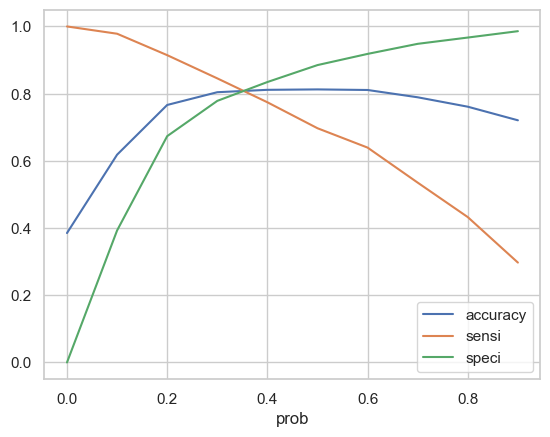

In [118]:
# Plotting accuracy, sensitivity, and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.079012,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.035486,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.167173,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.713860,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.628080,1,1,1,1,1,1,1,1,0,0,0,1


In [120]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8061722563375846

In [121]:
# Creating the confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3146,  759],
       [ 472, 1974]])

In [122]:
## Checking other metrics as well

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Calculating the sensitivity of the logistic regression model
TP / float(TP+FN)

0.8070318887980377

In [125]:
# Calculating specificity
TN / float(TN+FP)

0.8056338028169014

In [126]:
# Calculating F1 score

TP / (TP+ 0.5*(FP+FN))

0.7623093261247345

#### The cut off value of 0.35 has given accuracy, sensitivity and specificity above 80%

In [127]:
# Calculate false postive rate - predicting conversion when customer does not have converted

print("False postive rate:",FP/ float(TN+FP))

# Positive predictive value 

print ("Positive predictive value", TP / float(TP+FP))

# Negative predictive value

print ("Negative predictive value:",TN / float(TN+ FN))

False postive rate: 0.19436619718309858
Positive predictive value 0.7222832052689352
Negative predictive value: 0.8695411829740188


In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.079012,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.035486,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.167173,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.713860,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.628080,1,1,1,1,1,1,1,1,0,0,0,1


In [129]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8123130215714061

In [130]:
# Creating confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3279,  626],
       [ 566, 1880]])

In [131]:
TP = confusion3[1,1]

TN = confusion3[0,0]

FP = confusion3[0,1] 

FN = confusion3[1,0]

In [132]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7501995211492418

In [133]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7686017988552739

## Making prdiction on test set

In [134]:
y_test = leads_test.pop('Converted')
X_test = leads_test

In [135]:
print(y_test.shape)
print(X_test.shape)

(2723,)
(2723, 50)


In [136]:
# Scaling numeric data in test set
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Using MinMax scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_test[var] = scaler.fit_transform(X_test[var])

In [137]:
# Using the columns used in the final model during training, which is stored in 'cols4'

X_test = X_test[cols4]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Others,Specialization_Missing,What is your current occupation_Working Professional,What matters most to you in choosing a course_Missing,Last Notable Activity_SMS Sent
3271,0.095238,0.069102,0,0,0,0,1,0,1,0,1,0
1490,0.119048,0.665933,1,0,0,0,1,0,0,1,0,0
7936,0.047619,0.032570,0,0,0,0,1,0,1,0,1,0
4216,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0
3830,0.190476,0.072183,1,0,0,0,1,0,0,0,1,0


In [138]:
#adding constant
X_test_sm = sm.add_constant(X_test)

In [139]:
y_test_pred = res_f.predict(X_test_sm)

In [140]:
y_test_pred[:10]

3271    0.059733
1490    0.967334
7936    0.046936
4216    0.928736
3830    0.065224
1800    0.641544
6507    0.387572
4821    0.313305
4223    0.957297
4714    0.061477
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.059733
1490,0.967334
7936,0.046936
4216,0.928736
3830,0.065224


In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,Converted,0
0,0,0.059733
1,1,0.967334
2,0,0.046936
3,1,0.928736
4,0,0.065224


In [144]:
#Renaming the column 0 to 'Conversion_Prob'
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.059733
1,1,0.967334
2,0,0.046936
3,1,0.928736
4,0,0.065224


In [145]:
# Making final prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.059733,0
1,1,0.967334,1
2,0,0.046936,0
3,1,0.928736,1
4,0,0.065224,0


In [146]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8046272493573264

In [147]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
print(confusion2)

[[1404  330]
 [ 202  787]]


In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Calculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7957532861476239

In [150]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.8096885813148789

#### The accuracy, specificity and sensitivity of the model on the test data is around 80%

## Finding optimal cutoff based on Precision and Recall

### Precision

In [151]:
# TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7915506035283194

### Recall

In [152]:
# TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.697056418642682

With the cut off of 0.35, the precision is 79% and recall is around 70%

### Tradeoff between Pricision and Recall

In [153]:
from sklearn.metrics import precision_recall_curve

In [154]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

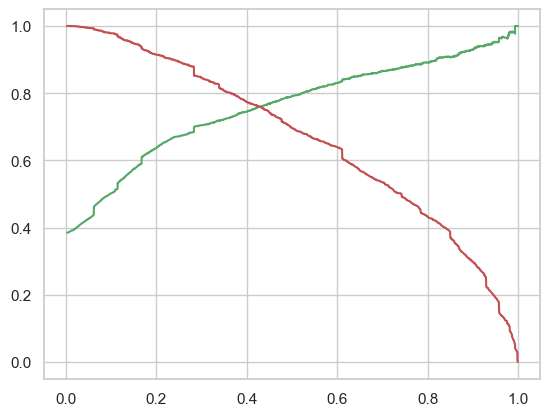

In [156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Above graph shows 0.42 as the cutoff considering precision and recall

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.079012,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.035486,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.167173,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.713860,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.628080,1,1,1,1,1,1,1,1,0,0,0,1


In [158]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8142024877971973

In [159]:
# Creating confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3301,  604],
       [ 576, 1870]])

In [160]:
TP = confusion[1,1]

TN = confusion[0,0]

FP = confusion[0,1] 

FN = confusion[1,0]

In [161]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7558609539207761

In [162]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7645134914145544

## Making prdiction on test set based on Precision-Recall optimum cutoff

In [163]:
# Making final prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.059733,0
1,1,0.967334,1
2,0,0.046936,0
3,1,0.928736,1
4,0,0.065224,0


In [164]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8196841718692618

In [165]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
print(confusion2)

[[1477  257]
 [ 234  755]]


In [166]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7460474308300395

In [169]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7633973710819009

# Inferences

- It is observed that following people are more likely 
to enquire about the courses or potential leads
    - Unemployed
    - Looking for better career prospects

- The Source for most of the leads is ‘Google’
- Most leads chose not to put their ‘Specialization
- Leads with origin as ‘Landing Page Submission’ are most likely to get converted.
- Sending SMS was the last activity of most of the leads converted.
- They also chose ‘No’ for ‘Do Not Email’
- Key point to note is, unemployed people are looking for upskilling, so company should target them more.
